**Question # 02: Use any datasets from Kaggle competition not earlier than 2020, compare and analyze the performance of decision trees on that dataset (with different hyper-parameter tuning) using F-measure and Accuracy. Plot performance curves and discuss. Use 10 Fold Cross Validation and random train/test split (70%, 30%).**

Dataset Link: https://www.kaggle.com/code/mariyamalshatta/heart-attack-risk-analysis-competition/input

In [2]:
# Importing necessary Libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

In [3]:
# Loading Dataset
data = pd.read_csv('/content/Dataset.csv')

In [4]:
# Displaying top 5 rows
data.head (5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [5]:
print('No of Samples:', len(data.index))
print('No of unique Patient ID\'s :', len(data['Patient ID'].unique()))

No of Samples: 7010
No of unique Patient ID's : 7010


In [6]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

data['Systolic'] = data['Systolic'].astype(float)
data['Diastolic'] = data['Diastolic'].astype(float)

data.drop('Blood Pressure', axis=1, inplace=True)

In [7]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,RDG0550,33,Male,200,48,0,1,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129.0,90.0
1,NMA3851,56,Female,262,46,1,0,1,0,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159.0,105.0
2,TUI5807,19,Female,140,54,0,1,0,0,1,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161.0,109.0
3,YYT5016,50,Female,163,53,0,1,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120.0,62.0
4,ZAC5937,89,Female,144,92,1,0,1,0,1,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153.0,110.0


In [8]:
# Defining feature columns and target variable
features = ['Age', 'Sex', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'Diabetes', 'Family History',
            'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
            'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
            'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
            'Country', 'Continent', 'Hemisphere']
target = 'Heart Attack Risk'

In [9]:
X = data[features]
y = data[target]

In [10]:
# Encoding categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Diabetes', 'Diet', 'Country', 'Continent', 'Hemisphere'])

Hyperparameter Tuning 01


*   test/train split
*   entropy
*   max_depth = 2, 3, 4, 5, 6, None
*   min_samples_split = 4


Max_depth 2
Accuracy :  0.6395625297194484
f1 score :  0.0


Max_depth 3
Accuracy :  0.6381359961959105
f1 score :  0.01297016861219196


Max_depth 4
Accuracy :  0.6343319067998098
f1 score :  0.017879948914431672


Max_depth 5
Accuracy :  0.6367094626723728
f1 score :  0.03535353535353536


Max_depth 6
Accuracy :  0.6229196386115073
f1 score :  0.09371428571428571


Max_depth None
Accuracy :  0.5335235378031383
f1 score :  0.35332893869479237




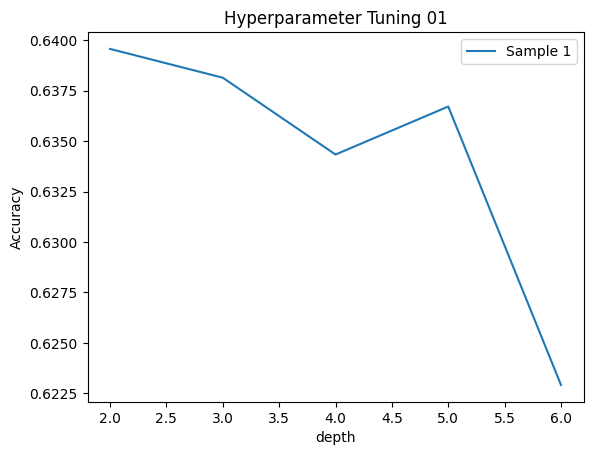

In [11]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [2, 3, 4, 5, 6, None]
accuracy = []

for depth in depths:
  tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=4)
  tree.fit(X_train, Y_train)
  Y_predicted = tree.predict(X_test)

  tree_accuracy = accuracy_score(Y_test, Y_predicted)
  accuracy.append(tree_accuracy)
  tree_f1 = f1_score(Y_test, Y_predicted)

  print('Max_depth', depth)
  print('Accuracy : ', tree_accuracy)
  print('f1 score : ', tree_f1)
  print('\n')

plt.plot(depths, accuracy, label='Sample 1')
plt.title('Hyperparameter Tuning 01')
plt.legend()
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()

Hyperparameter Tuning 02


*   test/train split
*   Gini
*   max_depth = 2, 3, 4, 5, 6, None
*   min_samples_split = 4

Max_depth 2
Accuracy :  0.6381359961959105
f1 score :  0.01806451612903226


Max_depth 3
Accuracy :  0.637660485021398
f1 score :  0.0


Max_depth 4
Accuracy :  0.640038040893961
f1 score :  0.018158236057068743


Max_depth 5
Accuracy :  0.6367094626723728
f1 score :  0.02551020408163265


Max_depth 6
Accuracy :  0.6224441274369947
f1 score :  0.08944954128440366


Max_depth None
Accuracy :  0.5401806942463148
f1 score :  0.3692106979778212




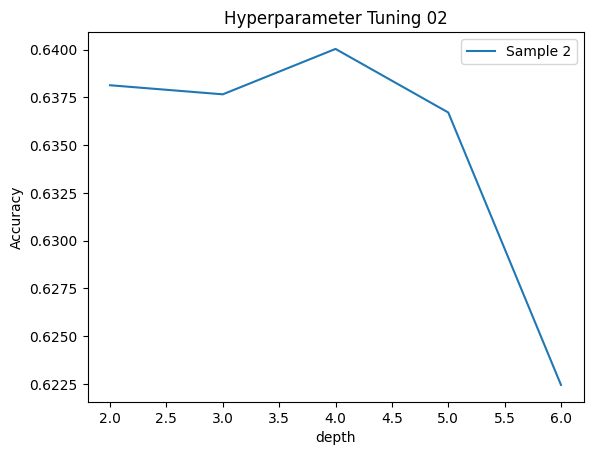

In [13]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [2, 3, 4, 5, 6, None]
accuracy = []

for depth in depths:
  tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_split=4)
  tree.fit(X_train, Y_train)
  Y_predicted = tree.predict(X_test)

  tree_accuracy = accuracy_score(Y_test, Y_predicted)
  accuracy.append(tree_accuracy)
  tree_f1 = f1_score(Y_test, Y_predicted)

  print('Max_depth', depth)
  print('Accuracy : ', tree_accuracy)
  print('f1 score : ', tree_f1)
  print('\n')

plt.plot(depths, accuracy, label='Sample 2')
plt.title('Hyperparameter Tuning 02')
plt.legend()
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()

Hyperparameter Tuning 03


*   10-fold Cross validation
*   Entropy
*   max_depth = 5
*   min_samples_split = 4

Accuracy: 0.5333808844507846
F1 Score: 0.5342409415010885


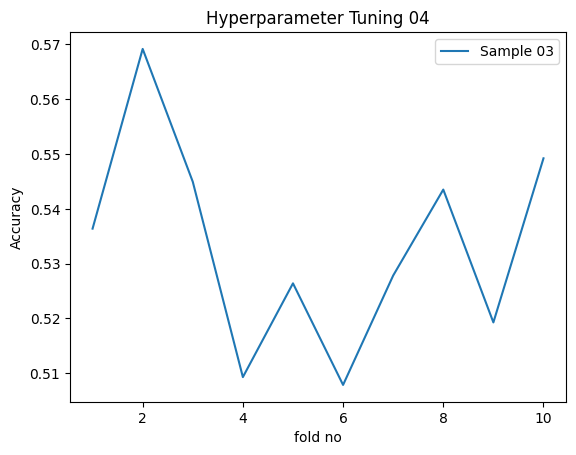

In [29]:
from sklearn.model_selection import KFold

tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4)

accuracy = []
f1 = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for tr_index, te_index in kf.split(X):
    X_train, X_test = X.iloc[tr_index], X.iloc[te_index]
    y_train, y_test = y[tr_index], y[te_index]

    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy.append(fold_accuracy)
    f1.append(fold_f1)

mean_accuracy = sum(accuracy) / 10
mean_f1 = sum(f1) / 10

print("Accuracy:", mean_accuracy)
print("F1 Score:", mean_f1)

fold_no = [i for i in range(1,11)]
plt.plot(fold_no,accuracy, label='Sample 03')
plt.title('Hyperparameter Tuning 04')
plt.legend()
plt.xlabel("fold no")
plt.ylabel("Accuracy")
plt.show()

Hyperparameter Tuning 04


*   10-fold Cross validation
*   Gini
*   max_depth = 5
*   min_samples_split = 4

Accuracy: 0.5349500713266762
F1 Score: 0.5345961657172815


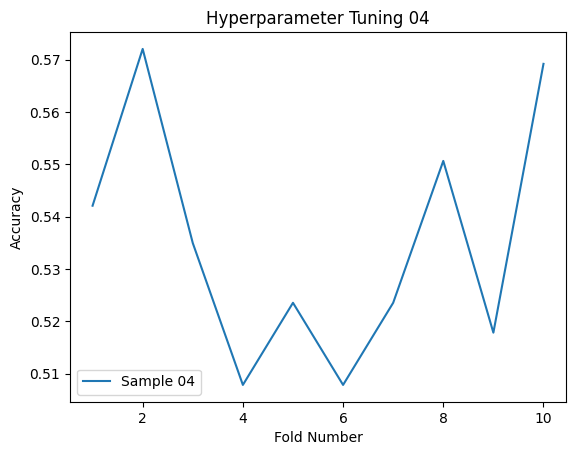

In [28]:
from sklearn.model_selection import KFold

tree4 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=4)

accuracy = []
f1 = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for tr_index, te_index in kf.split(X):
    X_train, X_test = X.iloc[tr_index], X.iloc[te_index]
    y_train, y_test = y[tr_index], y[te_index]

    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy.append(fold_accuracy)
    f1.append(fold_f1)

mean_accuracy = sum(accuracy) / 10
mean_f1 = sum(f1) / 10

print("Accuracy:", mean_accuracy)
print("F1 Score:", mean_f1)

fold_no = [i for i in range(1,11)]
plt.plot(fold_no, accuracy, label='Sample 04')
plt.title('Hyperparameter Tuning 04')
plt.legend()
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.show()